# Analysis of Ford Gobike Service (February 2019)
## by Ademola Oladapo

## Introduction
> - Ford Gobike is a shared transport service in which bicycles are made available for shared use to individuals on a short-term basis for a price or free. Ford Gobike share systems allow people to borrow a bike from a Ford station's dock and return it at another station's dock belonging to Ford Gobike. Docks are special bike racks that lock the bike, and only release it by computer control. The user enters payment information, and the computer unlocks a bike. The user returns the bike by placing it in the dock, which locks it in place.
>- The Ford Gobike Dataset comprises 183412 rows and 16 columns 

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style('darkgrid')
%matplotlib inline

### Loading the dataset


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.head().T

,0,1,2,3,4
duration_sec,52185,42521,61854,36490,1585
start_time,2019-02-28 17:32:10.1450,2019-02-28 18:53:21.7890,2019-02-28 12:13:13.2180,2019-02-28 17:54:26.0100,2019-02-28 23:54:18.5490
end_time,2019-03-01 08:01:55.9750,2019-03-01 06:42:03.0560,2019-03-01 05:24:08.1460,2019-03-01 04:02:36.8420,2019-03-01 00:20:44.0740
start_station_id,21.0,23.0,86.0,375.0,7.0
start_station_name,Montgomery St BART Station (Market St at 2nd St),The Embarcadero at Steuart St,Market St at Dolores St,Grove St at Masonic Ave,Frank H Ogawa Plaza
start_station_latitude,37.789625,37.791464,37.769305,37.774836,37.804562
start_station_longitude,-122.400811,-122.391034,-122.426826,-122.446546,-122.271738
end_station_id,13.0,81.0,3.0,70.0,222.0
end_station_name,Commercial St at Montgomery St,Berry St at 4th St,Powell St BART Station (Market St at 4th St),Central Ave at Fell St,10th Ave at E 15th St
end_station_latitude,37.794231,37.77588,37.786375,37.773311,37.792714


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### The Following issues will be looked into
- start_time and end_time will be chnaged to datetime datatypes
- deal with missing values only on start_station_name
- change user_type nd member_gender to categorical data

In [5]:
#check for duplicates in the dataset
df.duplicated().sum()

0

In [6]:
#creating a copy
tripdata = df.copy()

In [7]:
#droping Rides with no start station name
no_start_station_name = tripdata[pd.isnull(tripdata['start_station_name'])].index

def drop_rows_cols(dframe, rows_cols, axis=0):
    dframe.drop(rows_cols, axis=axis, inplace=True)
drop_rows_cols(tripdata, no_start_station_name)

In [8]:
#convert start_time and end_time to datetime format
tripdata['start_time'] = pd.to_datetime(tripdata['start_time'])
tripdata['end_time'] = pd.to_datetime(tripdata['end_time'])

In [9]:
#creating a column for members age
def compute_age(x):
    if x == 0:
        return 0
    else:
        return 2019 - x

tripdata['members_age'] = tripdata['member_birth_year'].apply(compute_age).fillna(0).astype(int)

In [10]:
#convert the birth year to integer and birthyear, usertype to category type
tripdata['member_birth_year'] = tripdata['member_birth_year'].fillna(0).astype(int)
tripdata['member_gender'] = tripdata['member_gender'].astype('category')
tripdata['user_type'] = tripdata['user_type'].astype('category')

In [11]:
#convertng the duration in seconds to munnites
tripdata['duration_sec'] = tripdata['duration_sec']/60
tripdata.rename(columns = {'duration_sec': 'duration_min'}, inplace=True)

In [12]:
#create day column from start_time
tripdata['weekday'] = tripdata['start_time'].dt.day_name()
tripdata['day'] = tripdata['start_time'].dt.day

In [13]:
tripdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_min             183215 non-null  float64       
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type       

In [14]:
tripdata.describe()

,duration_min,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,members_age,day
count,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000,183215.000000
mean,12.098367,138.590427,37.771615,-122.353104,136.249123,37.771820,-122.352689,4473.218792,1895.288475,32.654586,15.296581
std,29.917978,111.778864,0.098914,0.116387,111.515131,0.098819,0.115961,1665.249372,412.013105,12.171020,8.028844
min,1.016667,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,0.000000,0.000000,1.000000
25%,5.416667,47.000000,37.770407,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1979.000000,26.000000,8.000000
50%,8.566667,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,31.000000,15.000000
75%,13.266667,239.000000,37.797280,-122.287180,235.000000,37.797320,-122.288665,5503.000000,1992.000000,38.000000,22.000000
max,1424.066667,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,141.000000,28.000000


##### Checking for outliers

In [15]:
max_trip = tripdata['duration_min'].quantile(.99)

In [16]:
tripdata = tripdata[tripdata['duration_min'] <= max_trip]

In [17]:
tripdata.describe()

,duration_min,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,members_age,day
count,181382.000000,181382.000000,181382.000000,181382.000000,181382.000000,181382.000000,181382.000000,181382.000000,181382.000000,181382.000000,181382.000000
mean,10.358128,138.494173,37.771570,-122.352878,135.994415,37.771766,-122.352449,4475.460272,1898.021220,32.697203,15.292818
std,7.379378,111.510368,0.099078,0.116509,111.153987,0.098974,0.116067,1663.699154,405.982033,12.114340,8.034211
min,1.016667,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,0.000000,0.000000,1.000000
25%,5.383333,47.000000,37.770083,-122.411901,44.000000,37.770407,-122.411726,3783.000000,1979.000000,26.000000,8.000000
50%,8.500000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.397437,4959.000000,1987.000000,31.000000,15.000000
75%,13.066667,239.000000,37.797280,-122.286533,233.000000,37.797320,-122.288045,5503.000000,1992.000000,38.000000,22.000000
max,57.600000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,141.000000,28.000000


In [18]:
max_age = tripdata['members_age'].quantile(.95)

In [19]:
tripdata = tripdata[tripdata['members_age'] <= max_age]

In [20]:
tripdata.to_csv('tripdata.csv', index=False)

In [21]:
tripdata.describe()

,duration_min,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,members_age,day
count,172400.000000,172400.000000,172400.000000,172400.000000,172400.000000,172400.000000,172400.000000,172400.000000,172400.000000,172400.000000,172400.000000
mean,10.303445,139.199443,37.771326,-122.352491,136.519136,37.771523,-122.352037,4488.729408,1894.894078,31.224896,15.281479
std,7.298626,111.681640,0.099781,0.117119,111.237350,0.099680,0.116673,1656.477147,416.182721,10.370435,8.037913
min,1.016667,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,0.000000,0.000000,1.000000
25%,5.383333,49.000000,37.770083,-122.411901,44.000000,37.770407,-122.411647,3815.000000,1980.000000,26.000000,8.000000
50%,8.483333,104.000000,37.780760,-122.398285,100.000000,37.780955,-122.397437,4963.000000,1987.000000,31.000000,15.000000
75%,13.000000,239.000000,37.797280,-122.283282,238.000000,37.797320,-122.287610,5506.000000,1992.000000,37.000000,22.000000
max,57.600000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,54.000000,28.000000


### What is the structure of your dataset?

> The Ford Gobike Dataset comprises 183412 rows and 16 columns

### What is the main feature(s)  of interest in the dataset

> I am interested in exploring the rides 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features in the dataset that will support my investigations are duration_min, gender, usertype, start station name and end station name

## Univariate Exploration

## Distribution of Trips in Minutes

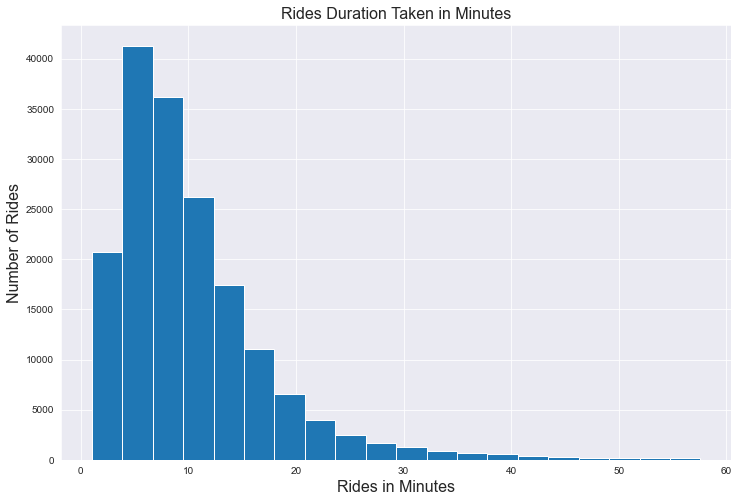

In [22]:
plt.figure(figsize=(12,8))
plt.hist(data = tripdata, x = 'duration_min', bins=20,)
plt.xlabel('Rides in Minutes',fontsize=16)
plt.ylabel('Number of Rides',fontsize=16)
plt.title('Rides Duration Taken in Minutes',fontsize=16);

### We can see that more trips are below 15 minutes

## Daily Bike Rides From Start Station

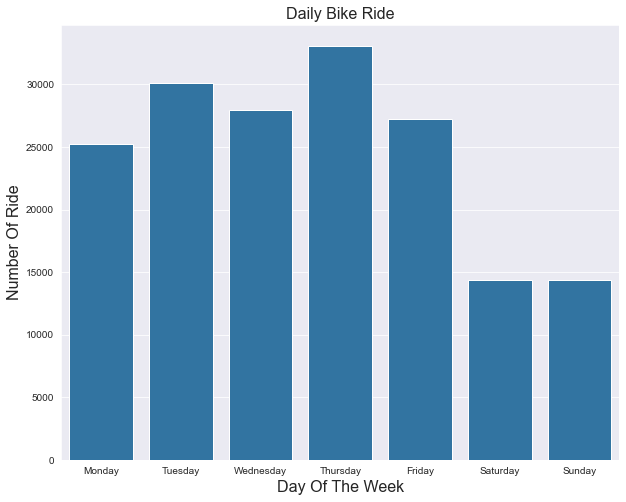

In [23]:
base_color = sb.color_palette()[0]
plot_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
plt.figure(figsize=(10,8))
sb.countplot(data=tripdata, x= 'weekday', color=base_color, order=plot_order)
plt.title('Daily Bike Ride', fontsize=16)
plt.ylabel('Number Of Ride', fontsize=16)
plt.xlabel('Day Of The Week', fontsize=16);

### More trips were taken during the weekday than the weekend, while the most trips are taken on Thursday

## Top 10 Start Station with the most Rides

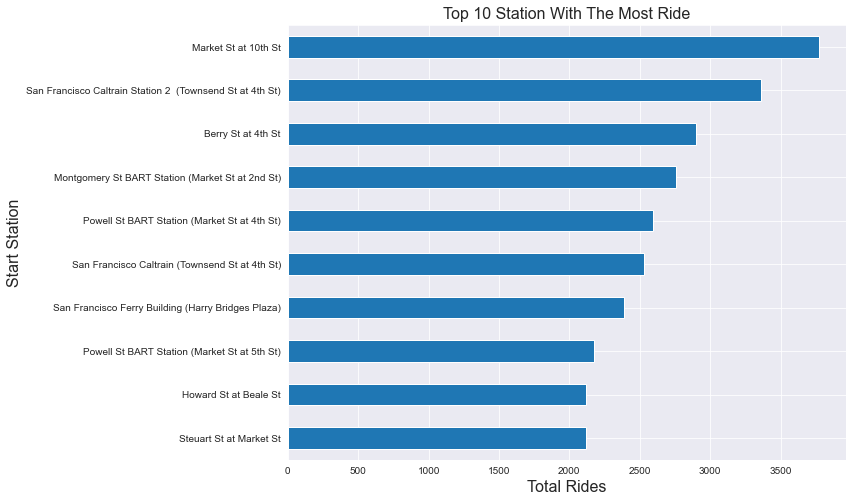

In [24]:
plt.figure(figsize=(10,8))
tripdata['start_station_name'].value_counts().head(10).plot.barh()
plt.gca().invert_yaxis()
plt.title('Top 10 Station With The Most Ride', fontsize=16)
plt.ylabel('Start Station', fontsize=16)
plt.xlabel('Total Rides', fontsize=16);

### We can see from the above plot that Market Street at 10th Street had the highest Bike Trips, followed by San Francisco Caltrain Station 2 and Berry Street at 4th

## Top 10 End Station For Termination of Rides

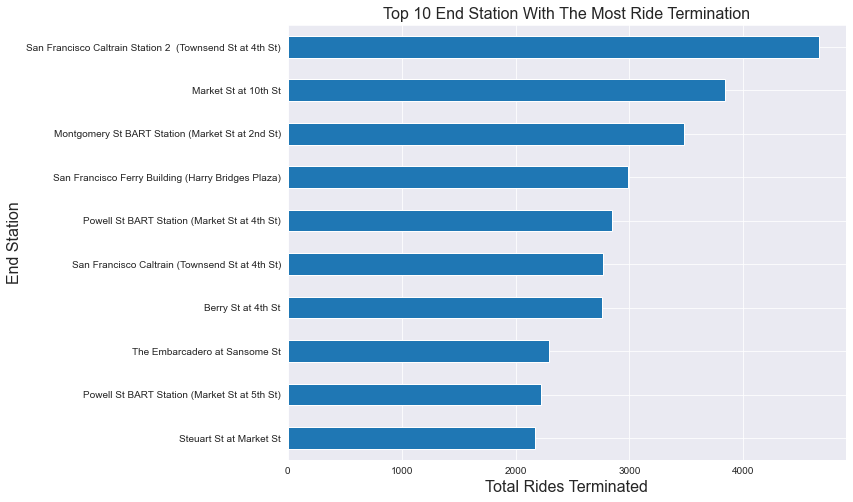

In [25]:
plt.figure(figsize=(10,8))
tripdata['end_station_name'].value_counts().head(10).plot.barh()
plt.gca().invert_yaxis()
plt.title('Top 10 End Station With The Most Ride Termination', fontsize=16)
plt.ylabel('End Station', fontsize=16)
plt.xlabel('Total Rides Terminated', fontsize=16);

### San Francicso Caltrain Station 2 see the most ride termination followed by Market street at 10th street

## Distribution of Members Gender

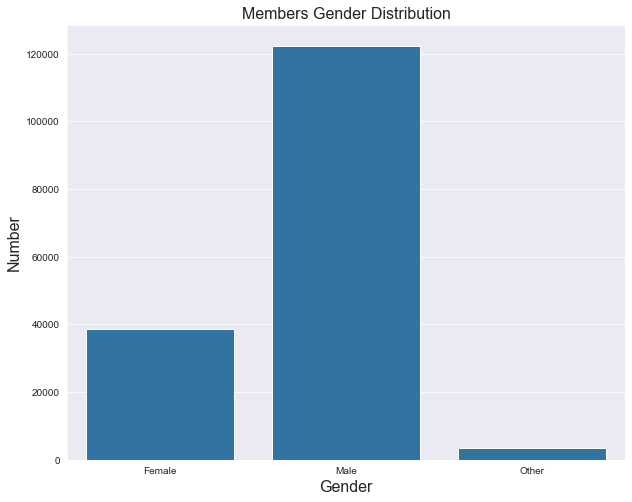

In [26]:
plt.figure(figsize=(10,8))
sb.countplot(data=tripdata, x='member_gender', color=base_color)
plt.title('Members Gender Distribution', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.xlabel('Gender', fontsize=16);

### Male account for almost 75% of the subscriber/customer while female is about 23% while others is 2%

## Distribution of Users

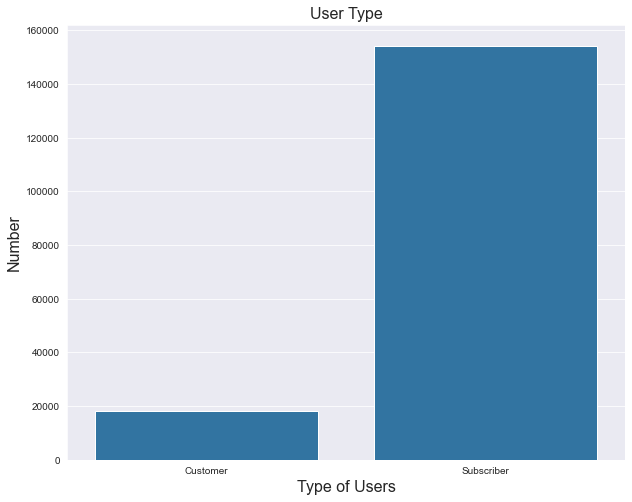

In [27]:
plt.figure(figsize=(10,8))
sb.countplot(data=tripdata, x='user_type', color=base_color)
plt.title('User Type', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.xlabel('Type of Users', fontsize=16);

### Subscriber acount for almost 90% of user type, which is good for the business

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution showed that more rides happened for for below 15 minutes and become fewer after the 20 minutes mark and that though subscriber are nine time the population of customer, who are most likely casual user, the customer do more in rides and duration more than the subscribers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- There were quality issues with the datase, some columns dtype were not suitable for our analysis and had to be changed.
- Missing data were drop but limited to start station name.
- Some columns were computed from member_birth_year and start_time while duration_sec was change to duration_min.
- after cleaning the dataset, it was check for outliers on the members_age and duration_min column, which were also removed.
- all these were done to tidy the dataset and make it ready for analysis

## Bivariate Exploration

In [28]:
tripdata.describe()

,duration_min,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,members_age,day
count,172400.000000,172400.000000,172400.000000,172400.000000,172400.000000,172400.000000,172400.000000,172400.000000,172400.000000,172400.000000,172400.000000
mean,10.303445,139.199443,37.771326,-122.352491,136.519136,37.771523,-122.352037,4488.729408,1894.894078,31.224896,15.281479
std,7.298626,111.681640,0.099781,0.117119,111.237350,0.099680,0.116673,1656.477147,416.182721,10.370435,8.037913
min,1.016667,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,0.000000,0.000000,1.000000
25%,5.383333,49.000000,37.770083,-122.411901,44.000000,37.770407,-122.411647,3815.000000,1980.000000,26.000000,8.000000
50%,8.483333,104.000000,37.780760,-122.398285,100.000000,37.780955,-122.397437,4963.000000,1987.000000,31.000000,15.000000
75%,13.000000,239.000000,37.797280,-122.283282,238.000000,37.797320,-122.287610,5506.000000,1992.000000,37.000000,22.000000
max,57.600000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,54.000000,28.000000


## Which of the columns in the DataFrame have  some form of relationship

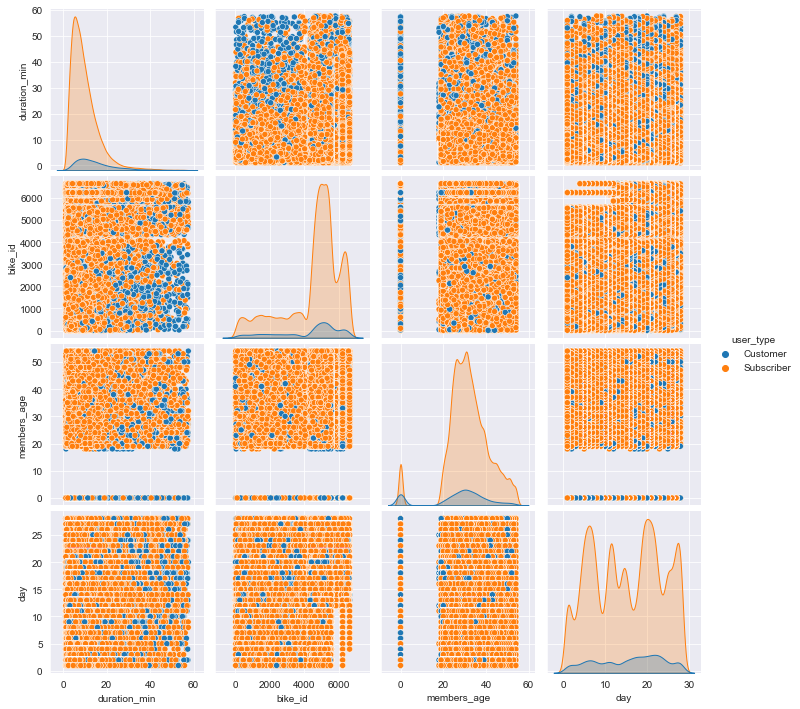

In [29]:
sb.pairplot(tripdata, vars=['duration_min','bike_id','members_age', 'day'], hue='user_type');

### The above plot showed no relationship between the columns, though it showes that subscriber are more in population than the customers

## Variability Of Age Distribution

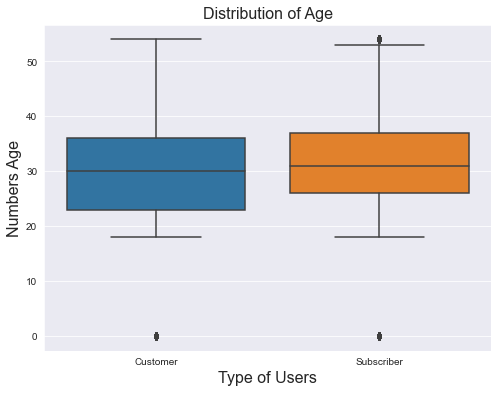

In [30]:
plt.figure(figsize=(8,6))
sb.boxplot(data=tripdata, x='user_type', y='members_age')
plt.title('Distribution of Age', fontsize=16)
plt.ylabel('Numbers Age', fontsize=16)
plt.xlabel('Type of Users', fontsize=16);

### The above boxplot indicated that there is less variability in the age distribution of the subscriber than the age distribution of the customer

## Gender Distribution By User Types

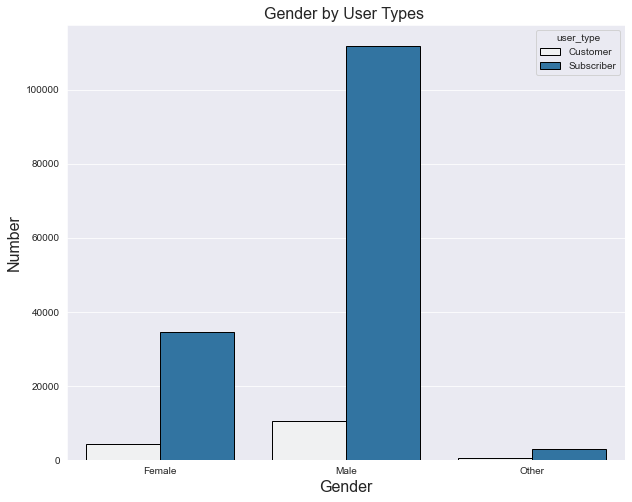

In [31]:
plt.figure(figsize=(10,8))
sb.countplot(data=tripdata, x='member_gender', color=base_color, hue='user_type', edgecolor='black')
plt.title('Gender by User Types ', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.xlabel('Gender', fontsize=16);

### This plot also indicate that there are more men in both user type

### Daily Rides in February 2019

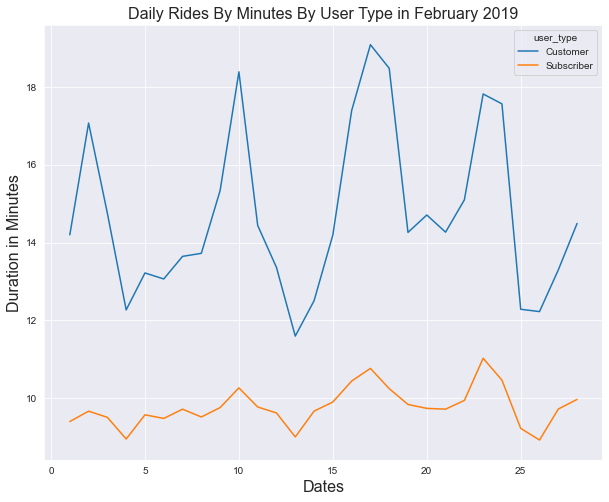

In [32]:
plt.figure(figsize=(10,8))
sb.lineplot(x='day', y='duration_min', data = tripdata,hue='user_type', ci=None)
plt.title('Daily Rides By Minutes By User Type in February 2019', fontsize=16)
plt.ylabel('Duration in Minutes', fontsize=16)
plt.xlabel('Dates', fontsize=16);

### The fluctuation in this plot is more with the customers than with the subscriber, while the longest ride among the customer was done around 16th of February for 19 minutes, the the longest ride for subscriber was done around the 23rd of February for 11 minutes

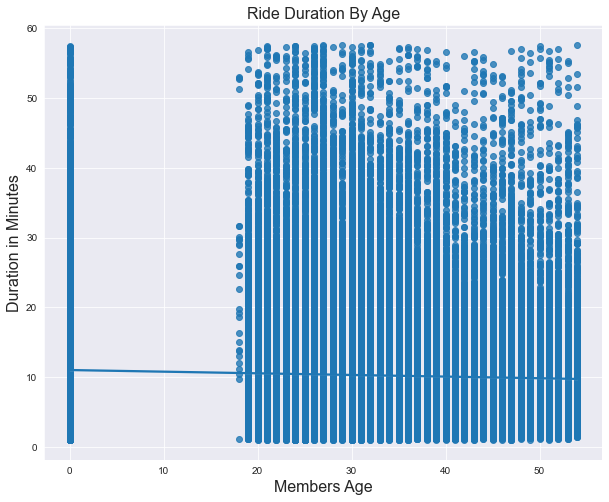

In [33]:
plt.figure(figsize=(10,8))
sb.regplot(y='duration_min', x = "members_age", data = tripdata)
plt.title('Ride Duration By Age', fontsize=16)
plt.ylabel('Duration in Minutes', fontsize=16)
plt.xlabel('Members Age', fontsize=16);

### From the above plot, we can clearly see that age is not a determinate of the length of rides

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The seaborn pairplot generated did not show any relationship, though it showed that the population of subscriber are more in number than the customer

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I discovered that there is more variability with the age distribution of the customer than with the subscriber of this service, and that though the customer, ho are largely casual user and 10% of the population, do more in rides and duration

## Multivariate Exploration

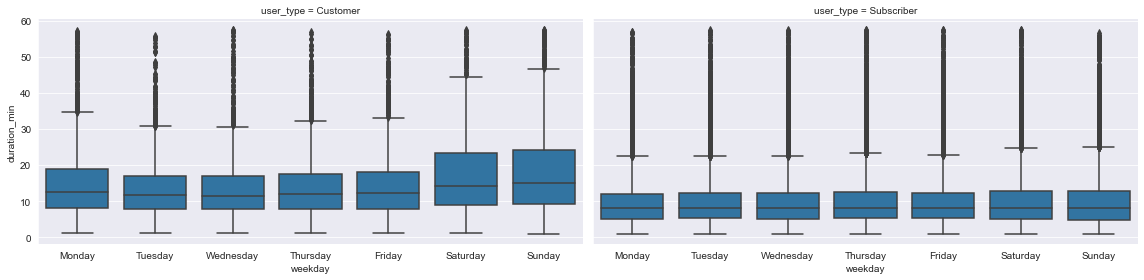

In [34]:
g = sb.FacetGrid(data = tripdata, col = 'user_type',height = 4, col_wrap=2, aspect=2)
g.map(sb.boxplot, 'weekday', 'duration_min', order=plot_order);

#### we can still see here that there also exist more veriability ride duration for customer while for subscriber the ride duration appears consistent during the weekdays

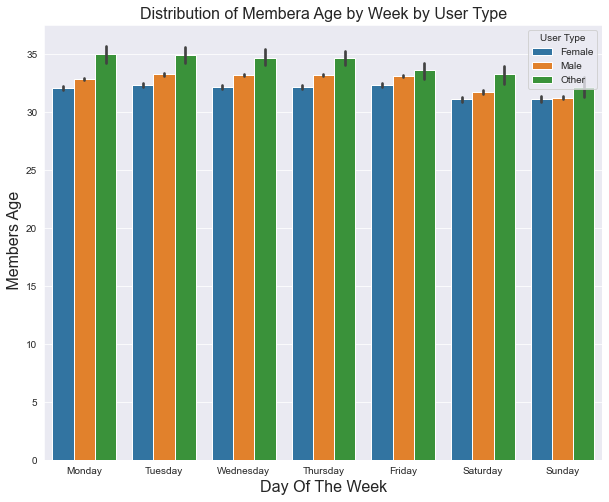

In [35]:
plt.figure(figsize=(10,8))
sb.barplot(x='weekday', y='members_age', data=tripdata, hue='member_gender', order=plot_order)
plt.legend(loc='upper right', title="User Type")
plt.title('Distribution of Membera Age by Week by User Type', fontsize=16)
plt.xlabel('Day Of The Week', fontsize=16)
plt.ylabel(' Members Age', fontsize=16);

### The above barplot indicates that the oldest rider on any given day of the week is always the gender other

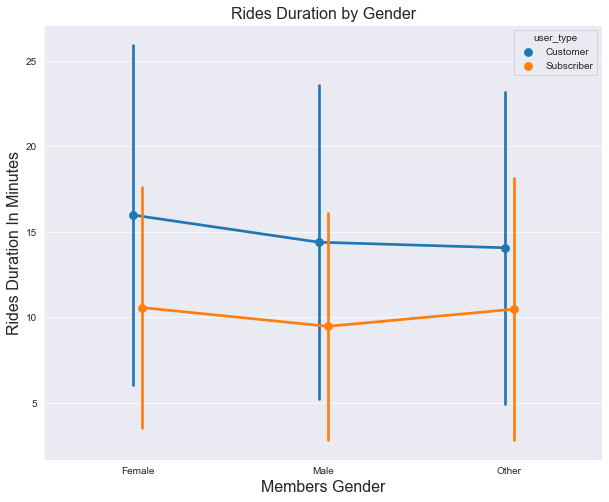

In [36]:
plt.figure(figsize=(10,8))
sb.pointplot(data=tripdata, x='member_gender', y='duration_min', hue='user_type', ci='sd', linestyle='', dodge=True)
plt.title('Rides Duration by Gender', fontsize=16)
plt.ylabel('Rides Duration In Minutes', fontsize=16)
plt.xlabel('Members Gender', fontsize=16);

### The above point plot showed that the longest ride is taken by the Female customer

<Figure size 720x576 with 0 Axes>

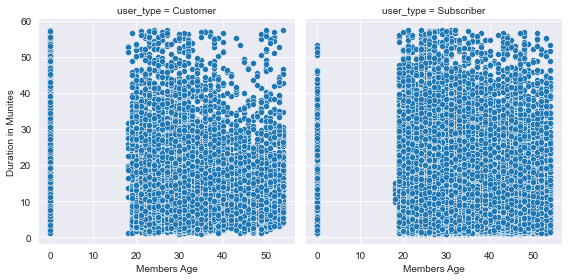

In [37]:
plt.figure(figsize=(10,8))
g= sb.FacetGrid(data = tripdata, col = 'user_type', height = 4)
g.map(sb.scatterplot, 'members_age', 'duration_min')
g.set_xlabels('Members Age')
g.set_ylabels('Duration in Munites');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Though the pots showed no relationship as it were, but the category by user_type and by gender showed some interesting insight about the rides duration, it was also obesrvation that while there were varation in the number of ride during the week days, the number of ride became stable dunring the weekends.

### Were there any interesting or surprising interactions between features?

> Although subcriber, who made up 90% of the population, do less number in ride and duration while customer, who are casual user did more in number and in duration.

## Conclusions
>The analysis indicated that there was no relationship what so ever amongs the variables, but it showed that the population of customers are 9 times that of the subscribers, that the customers do more in number of rides and duation, we also saw that the longest ride was by a female customer and that more rides happens between Market Street at 10th Street and San Francisco Caltrain Station 2, 
